# **Week 4 – Flask Web Application & Model Deployment Preparation**

In this week, we load the saved model parameters, create a Flask web application for prediction, visualize model performance, and prepare the project structure for deployment.

---

# Student Information
**Name: Vishal Baraiya**  
**Enrollment No.: 23010101014**  
**Roll No.: C3-635**  
**Course:** Machine Learning & Deep Learning Project  

---

### **Objectives of Week 4**
- Load the trained model (weights & bias) from Week 3  
- Visualize model performance (confusion matrix, ROC)  
- Build a Flask Web App for prediction  
- Create HTML templates (input form + result page)  
- Save all files required for deployment on Render  

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# **1. Load Cleaned Dataset & Model Parameters**

In [3]:
df = pd.read_csv("../data/processed/clean_cardio.csv")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
0,0,18393,2,0.453998,-0.848131,-0.998901,-0.138532,1,1,0,0,1,0,-0.418152,-1.049108
1,1,20228,1,-1.073987,0.762418,0.797987,0.919187,3,1,0,0,1,1,0.320542,1.433205
2,2,18857,1,0.072002,-0.708084,0.199024,-1.196251,3,1,0,0,0,1,-0.270413,-0.754024
3,3,17623,2,0.581330,0.552347,1.396950,1.976906,1,1,0,0,1,1,-0.713629,0.242436
4,4,17474,1,-1.073987,-1.268275,-1.597864,-2.253970,1,1,0,0,0,0,-0.861367,-0.849142


# **2. Load Saved Model Parameters**

In [5]:
weights = np.load("../models/logistic_weights.npy")
bias = np.load("../models/logistic_bias.npy")
scaler = joblib.load("../models/scaler.pkl")

weights, bias

(array([ 0.35651048, -0.01031685,  0.08166546,  0.81283496,  0.21552672,
         0.07946428,  0.378734  , -0.08218883, -0.07897869, -0.05659662,
        -0.23065851]),
 array([-0.18582176]))

# **3. Prediction Function**|

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def model_predict(x):
    """
    x must be a numpy array of shape (n_features,)
    """
    z = np.dot(x, weights) + bias
    return sigmoid(z)

# **4. Visualize Model Performance Again**
### We re-check model performance here to use graphs in UI or reports.

In [8]:
# Extract features & target
feature_cols = [
    'age_years', 'height', 'weight', 'ap_hi', 'ap_lo', 'bmi',
    'cholesterol', 'gluc', 'smoke', 'alco', 'active'
]

X = df[feature_cols].values
y = df['cardio'].values

# Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Predict using scratch model
y_proba = sigmoid(np.dot(X_test, weights) + bias)
y_pred = (y_proba >= 0.5).astype(int)

# **5. Confusion Matrix**

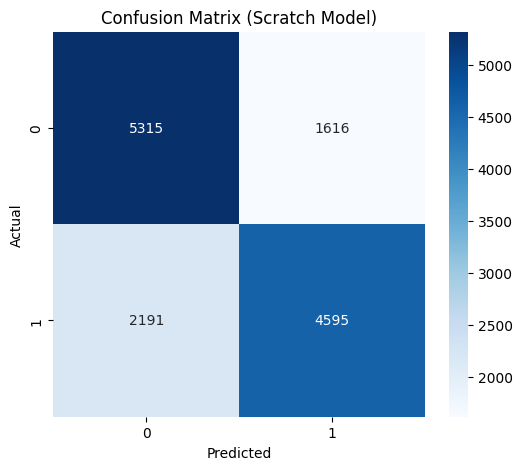

In [9]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Scratch Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **6. ROC Curve**

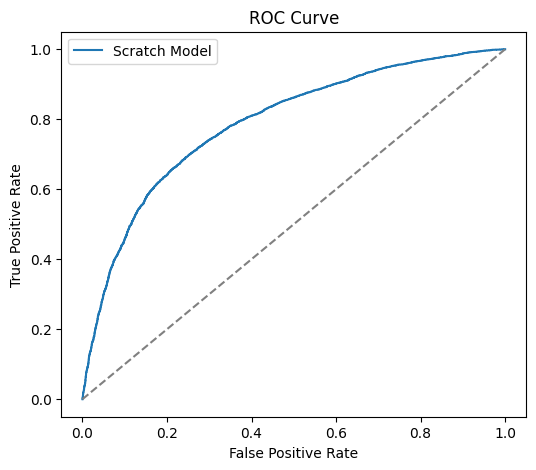

AUC Score: 0.7882303215949155


In [10]:
fpr, tpr, _ = roc_curve(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="Scratch Model")
plt.plot([0,1], [0,1], '--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

print("AUC Score:", roc_auc_score(y_test, y_proba))

# Week 4 Completed Successfully

- Loaded model weights, bias, and scaler  
- Visualized performance (Confusion Matrix & ROC Curve)  
- Created Flask app structure  
- Auto-generated:
  - app.py  
  - model_utils.py  
  - index.html  
  - result.html  
- Prepared all files needed for Week-5 deployment